Rysowanie Izoterm

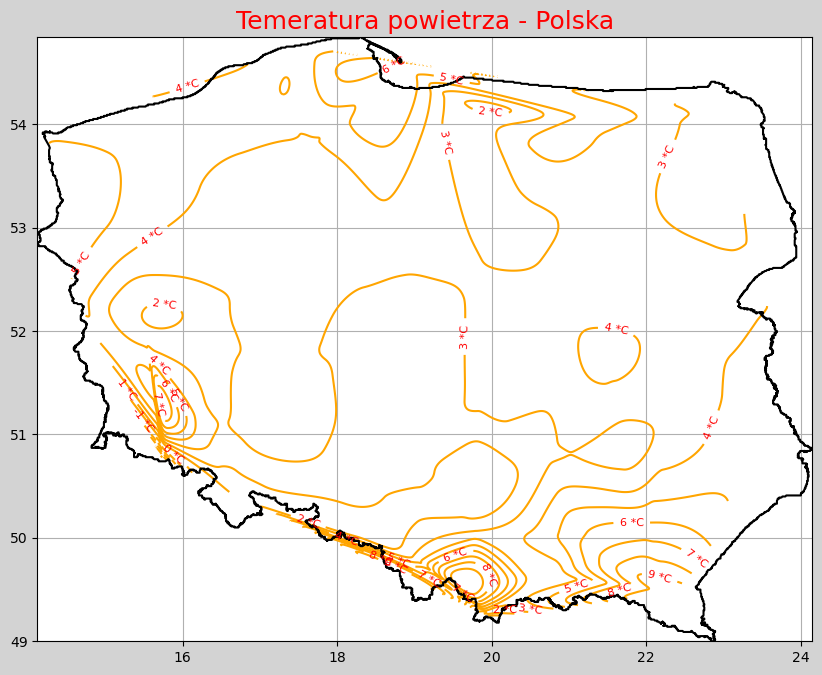

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
from  scipy.interpolate import griddata
%matplotlib inline

sesjaSQL=pyodbc.connect("""DRIVER={ODBC Driver 17 for SQL Server};
                           SERVER=analityk.wwsi.edu.pl,50221;
                           DATABASE=synop;
                           uid=student;
                           pwd=ciekawski""")
#ok------------------------------------------------------ok
zapytanie="""Select nr,dl,szer
from PolskaPunkty
"""
#ok-----------------------------------------------------ok
kontur=pd.read_sql(zapytanie,sesjaSQL)
#kontur.head()



zapytanie="""with ct as
(
  select top 1 godzina
  from depesze
  where data=cast(getdate() as date)
  group by godzina
  having count(*)>40
  order by godzina desc
)
Select S.Dlugosc as dl,
       S.Szerokosc as szer,
	   D.TemperaturaPowietrza as temp
       
from depesze as D JOIN Stacje as S
    ON D.stacja=S.IDStacji and kraj='Poland'
    
where data=cast(getdate() as date)
and   godzina=(select godzina from ct)"""
    

dane=pd.read_sql(zapytanie,sesjaSQL)
#dane.head()

############################Rozwiązanie problemu izolinii#############################################

# Przygotowanie danych wejsciowych

Dl=np.asarray(dane['dl'])
Szer=np.asarray(dane['szer'])
Temp=np.asarray(dane['temp'])
# Przygotowanie węzłów sieci regularnej

DlGr=np.linspace(min(kontur['dl']),max(kontur['dl']),1000)
SzerGr=np.linspace(min(kontur['szer']),max(kontur['szer']),1000)

#Iloczyn kartezjański
X,Y=np.meshgrid(DlGr,SzerGr)
# Obliczamy temperature w węzłach sieci regularnej
Temp=griddata((Dl,Szer),Temp, (X,Y),method='cubic')

okno=plt.figure("Temeratury na obszarze Polski", figsize=(10,8),dpi=100,facecolor='lightgray')
plt.title('Temeratura powietrza - Polska', color='red',fontsize=18)
plt.plot(kontur['dl'],kontur['szer'],color='black',lw=1.5)

izo=range(int(min(dane['temp']))-1,int(max(dane['temp']))+1,1)

izolinie=plt.contour(X,Y,Temp,colors='orange',levels=izo)
plt.clabel(izolinie, fontsize=8,fmt='%d *C',colors='red')

plt.grid()